<a href="https://colab.research.google.com/github/AleksandrRevuka/Algo_data_science/blob/main/1_Practical_skills_1_2_ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Process ETL:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
buildings = pd.read_csv("http://video.ittensive.com/machine-learning/ashrae/building_metadata.csv.gz")
weather = pd.read_csv("http://video.ittensive.com/machine-learning/ashrae/weather_train.csv.gz")
energy_0 = pd.read_csv("http://video.ittensive.com/machine-learning/ashrae/train.0.0.csv.gz")

In [4]:
buildings

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN


In [5]:
energy_0

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000
1,0,0,2016-01-01 01:00:00,0.000
2,0,0,2016-01-01 02:00:00,0.000
3,0,0,2016-01-01 03:00:00,0.000
4,0,0,2016-01-01 04:00:00,0.000
...,...,...,...,...
8779,0,0,2016-12-31 19:00:00,232.071
8780,0,0,2016-12-31 20:00:00,189.069
8781,0,0,2016-12-31 21:00:00,169.958
8782,0,0,2016-12-31 22:00:00,169.958


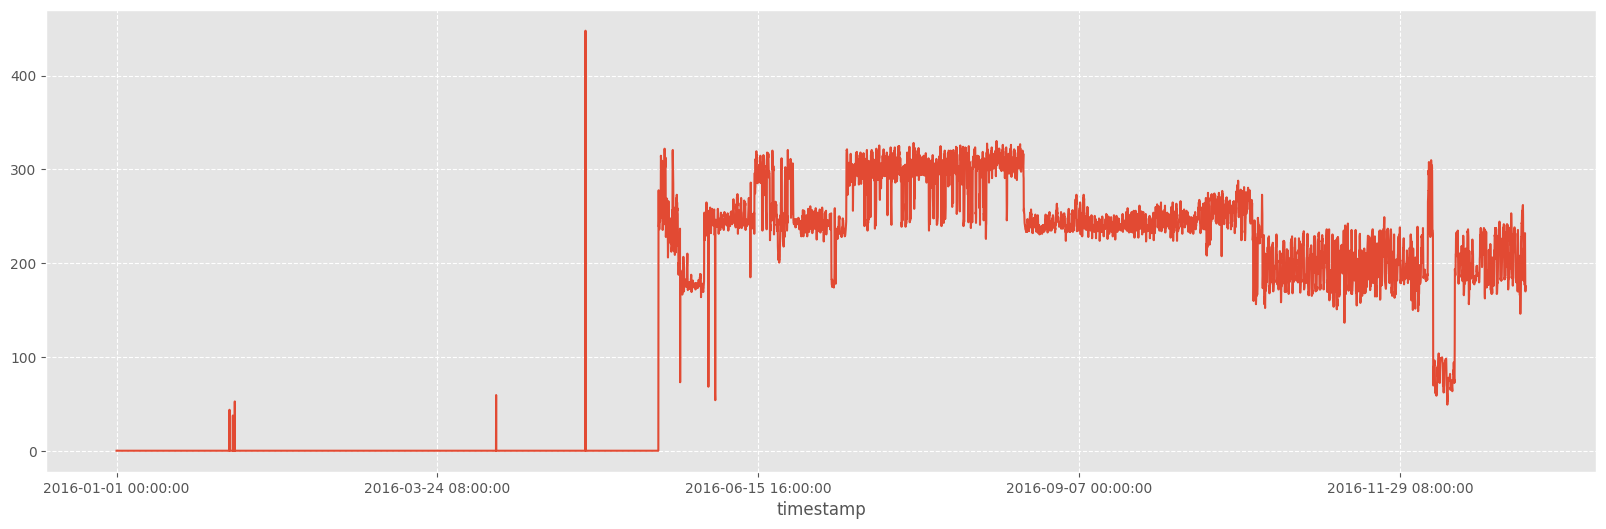

In [6]:
plt.style.use('ggplot')

plt.figure(figsize=(20, 6))

energy_0.set_index("timestamp")["meter_reading"].plot()

plt.grid(linestyle='--')
plt.show()

In [7]:
weather

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6


In [8]:
energy_0 = pd.merge(left=energy_0, right=buildings, how="left", left_on="building_id", right_on="building_id")

energy_0.set_index(["timestamp", "site_id"], inplace=True)
weather.set_index(["timestamp", "site_id"], inplace=True)

energy_0 = pd.merge(left=energy_0, right=weather, how="left", left_index=True, right_index=True)
energy_0.reset_index(inplace=True)

energy_0

,timestamp,site_id,building_id,meter,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,2016-01-01 00:00:00,0,0,0,0.000,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,2016-01-01 01:00:00,0,0,0,0.000,Education,7432,2008.0,NaN,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,2016-01-01 02:00:00,0,0,0,0.000,Education,7432,2008.0,NaN,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,2016-01-01 03:00:00,0,0,0,0.000,Education,7432,2008.0,NaN,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,2016-01-01 04:00:00,0,0,0,0.000,Education,7432,2008.0,NaN,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2016-12-31 19:00:00,0,0,0,232.071,Education,7432,2008.0,NaN,22.8,NaN,10.0,0.0,1021.7,140.0,5.7
8780,2016-12-31 20:00:00,0,0,0,189.069,Education,7432,2008.0,NaN,23.3,NaN,8.9,0.0,1021.0,170.0,4.1
8781,2016-12-31 21:00:00,0,0,0,169.958,Education,7432,2008.0,NaN,23.3,NaN,10.0,0.0,1021.1,150.0,4.1
8782,2016-12-31 22:00:00,0,0,0,169.958,Education,7432,2008.0,NaN,22.8,NaN,10.0,0.0,1021.1,160.0,3.1


In [9]:
for column in energy_0.columns:
  energy_nulls = energy_0[column].isnull().sum()
  if energy_nulls > 0:
    print(column + ": " + str(energy_nulls))

print(energy_0[energy_0["precip_depth_1_hr"].isnull()])

floor_count: 8784
air_temperature: 3
cloud_coverage: 3830
dew_temperature: 3
precip_depth_1_hr: 1
sea_level_pressure: 85
wind_direction: 250
             timestamp  site_id  building_id  meter  meter_reading  \
0  2016-01-01 00:00:00        0            0      0            0.0   

  primary_use  square_feet  year_built  floor_count  air_temperature  \
0   Education         7432      2008.0          NaN             25.0   

   cloud_coverage  dew_temperature  precip_depth_1_hr  sea_level_pressure  \
0             6.0             20.0                NaN              1019.7   

   wind_direction  wind_speed  
0             0.0         0.0  


In [10]:
energy_0["air_temperature"].fillna(0, inplace=True)
energy_0["cloud_coverage"].fillna(0, inplace=True)
energy_0["dew_temperature"].fillna(0, inplace=True)
energy_0["precip_depth_1_hr"] = energy_0['precip_depth_1_hr'].apply(lambda x: x if x > 0 else 0)
energy_0_sea_level_pressure_mean = energy_0['sea_level_pressure'].mean()
energy_0['sea_level_pressure'] = energy_0['sea_level_pressure'].apply(lambda x: energy_0_sea_level_pressure_mean if x != x else x)
energy_0_wind_direction_mean = energy_0['wind_direction'].mean()
energy_0['wind_direction'] = energy_0['wind_direction'].apply(lambda x:energy_0_wind_direction_mean if x != x else x)
energy_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           8784 non-null   object 
 1   site_id             8784 non-null   int64  
 2   building_id         8784 non-null   int64  
 3   meter               8784 non-null   int64  
 4   meter_reading       8784 non-null   float64
 5   primary_use         8784 non-null   object 
 6   square_feet         8784 non-null   int64  
 7   year_built          8784 non-null   float64
 8   floor_count         0 non-null      float64
 9   air_temperature     8784 non-null   float64
 10  cloud_coverage      8784 non-null   float64
 11  dew_temperature     8784 non-null   float64
 12  precip_depth_1_hr   8784 non-null   float64
 13  sea_level_pressure  8784 non-null   float64
 14  wind_direction      8784 non-null   float64
 15  wind_speed          8784 non-null   float64
dtypes: flo

In [11]:
energy_0

,timestamp,site_id,building_id,meter,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,2016-01-01 00:00:00,0,0,0,0.000,Education,7432,2008.0,NaN,25.0,6.0,20.0,0.0,1019.7,0.0,0.0
1,2016-01-01 01:00:00,0,0,0,0.000,Education,7432,2008.0,NaN,24.4,0.0,21.1,0.0,1020.2,70.0,1.5
2,2016-01-01 02:00:00,0,0,0,0.000,Education,7432,2008.0,NaN,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,2016-01-01 03:00:00,0,0,0,0.000,Education,7432,2008.0,NaN,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,2016-01-01 04:00:00,0,0,0,0.000,Education,7432,2008.0,NaN,20.0,2.0,20.0,0.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2016-12-31 19:00:00,0,0,0,232.071,Education,7432,2008.0,NaN,22.8,0.0,10.0,0.0,1021.7,140.0,5.7
8780,2016-12-31 20:00:00,0,0,0,189.069,Education,7432,2008.0,NaN,23.3,0.0,8.9,0.0,1021.0,170.0,4.1
8781,2016-12-31 21:00:00,0,0,0,169.958,Education,7432,2008.0,NaN,23.3,0.0,10.0,0.0,1021.1,150.0,4.1
8782,2016-12-31 22:00:00,0,0,0,169.958,Education,7432,2008.0,NaN,22.8,0.0,10.0,0.0,1021.1,160.0,3.1
